In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline

In [2]:
#load referendum data
#referendumData = pd.read_csv('./DATA/Referendum.csv', delimiter=';')
referendumData = pd.read_pickle('./DATA/referendumData_toLoad.pkl') #Data with Margins
rdColNames = referendumData.columns

In [3]:
#GENERATE CODEGEO
referendumData["Code du département"] = referendumData["Code du département"].apply(str)
referendumData["Code du département"] = referendumData["Code du département"].apply(lambda x: x.zfill(2))                                                                                    
referendumData["Code de la commune"] = referendumData["Code de la commune"].apply(str)
referendumData["Code de la commune"] = referendumData["Code de la commune"].apply(lambda x: x.zfill(3))   

#print(referendumData.dtypes)
referendumData["CODGEO"]=referendumData["Code du département"]+referendumData["Code de la commune"]
#referendumData.loc[referendumData['Libellé de la commune']=="Paris"]
#len(referendumData['CODGEO'].unique())


In [4]:
#load information on income and poverty by 
revenuData = pd.read_excel('./DATA/filo-revenu-pauvrete-menage-2013.xls',sheet_name='COM',skiprows=5)
revenuColNames = revenuData.columns
revenuData.loc[revenuData['LIBGEO']=="Paris"]

,CODGEO,LIBGEO,NBMENFISC13,NBPERSMENFISC13,MED13,PIMP13,TP6013,TP60AGE113,TP60AGE213,TP60AGE313,...,PPEN13,PPAT13,PPSOC13,PPFAM13,PPMINI13,PPLOGT13,PIMPOT13,RD13,D113,D913
30798,75056,Paris,1038789.0,2109850.5,25981.333333,72.0,16.0,18.0,14.0,18.0,...,19.8,20.7,2.9,1.0,1.0,0.9,-27.9,6.570314,9652.0,63416.666667


In [5]:
# Join grid and statsByDepartement by Departement Code
merged = pd.merge(referendumData,revenuData,how='inner',on='CODGEO')
mergedColNames = merged.columns

In [6]:
#To Test
mergedColNames[16:25]
#rdColNames[4:]

Index(['NBMENFISC13', 'NBPERSMENFISC13', 'MED13', 'PIMP13', 'TP6013',
       'TP60AGE113', 'TP60AGE213', 'TP60AGE313', 'TP60AGE413'],
      dtype='object')

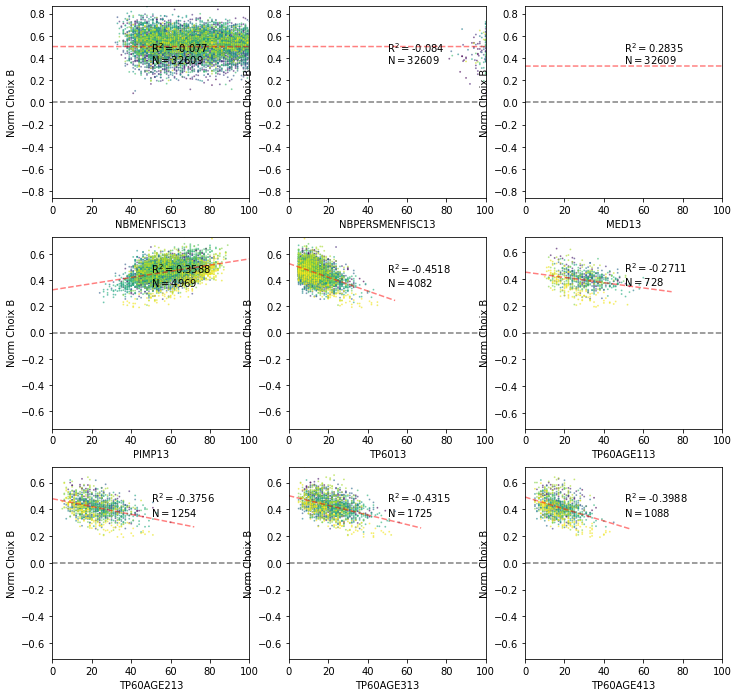

In [7]:
fig,axs = plt.subplots(3,3,figsize = (12,12),sharex=False, sharey=False)

referendumMeasurement = rdColNames[12] # {Margin : rdColNames[13]}

for i,ax in enumerate(axs.reshape(-1)):
    feature = mergedColNames[16:25][i]
    #Color by Departement
    colors = merged['Code du département'].loc[merged[feature].notna()==True]
    colors = merged['Code du département'].loc[merged[feature].notna()==True]

    x = merged[feature].loc[merged[feature].notna()==True]
    y = merged[referendumMeasurement].loc[merged[feature].notna()==True]

    colors.replace(to_replace='2A',value='02',inplace=True)
    colors.replace(to_replace='2B',value='02',inplace=True)
    colors = list(colors.apply(int))
    #colors.unique()
    
    #xlims = [0,1.1*x.max()]
    yl = np.max([abs(y.min()),abs(y.max())])
    ylims = [-1.*yl,yl]
    
    #Plot margin = 0%
    _xlim = ax.set_xlim([0.,100.])
    _ylim = ax.set_ylim(ylims)
    ax.plot([0.0,100.],[0.0,0.0], color='black', linestyle='dashed', alpha=0.5)

    
    linFit = linregress(x,y)
    ax.scatter(x,y, c=colors, alpha=0.5, s = 0.8)
    ax.plot([0.,1.2*x.max()],[linFit[1],linFit[1]+1.2*x.max()*linFit[0]], color='red',linestyle='dashed', alpha=0.5)
    ax.annotate("$\mathregular{R^2=}$"+str(np.round(linFit[2],4)),xy=(50,0.45))
    ax.annotate("$\mathregular{N=}$"+str(np.shape(x)[0]),xy=(50,0.35))
    #ax.set(aspect=100)

    ax.set_xlabel(feature)
    ax.set_ylabel(referendumMeasurement)
    
    #print(np.cov(x,y)/(np.std(x)*np.std(y)))


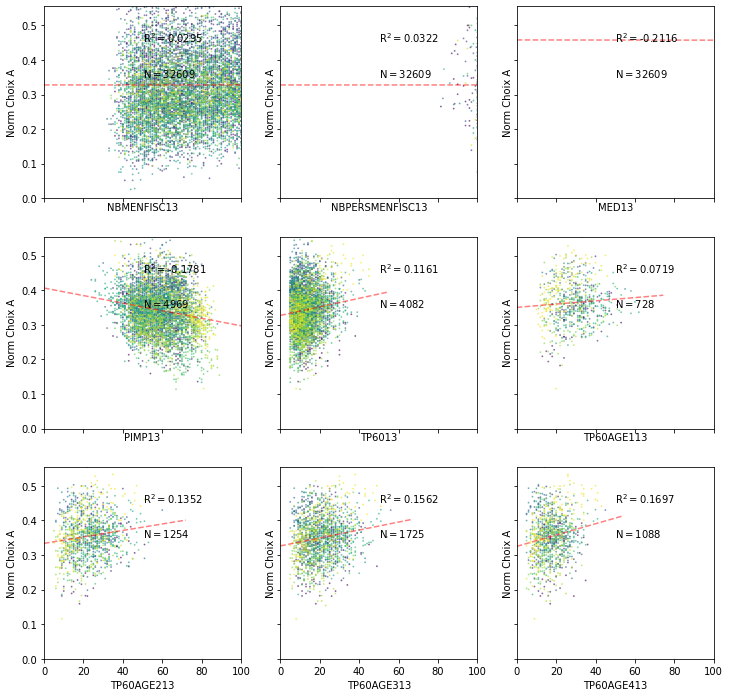

In [8]:
fig,axs = plt.subplots(3,3,figsize = (12,12),sharex=True, sharey=True)

referendumMeasurement = rdColNames[11] # {Margin : rdColNames[13]}

for i,ax in enumerate(axs.reshape(-1)):
    feature = mergedColNames[16:25][i]
    #Color by Departement
    colors = merged['Code du département'].loc[merged[feature].notna()==True]
    colors = merged['Code du département'].loc[merged[feature].notna()==True]

    x = merged[feature].loc[merged[feature].notna()==True]
    y = merged[referendumMeasurement].loc[merged[feature].notna()==True]

    colors.replace(to_replace='2A',value='02',inplace=True)
    colors.replace(to_replace='2B',value='02',inplace=True)
    colors = list(colors.apply(int))
    #colors.unique()
    
    #xlims = [0,1.1*x.max()]
    yl = np.max([abs(y.min()),abs(y.max())])
    ylims = [0,yl]
    
    #Plot margin = 0%
    _xlim = ax.set_xlim([0.,100.])
    _ylim = ax.set_ylim(ylims)
    #ax.plot([0.0,100.],[0.0,0.0], color='black', linestyle='dashed', alpha=0.5)

    
    linFit = linregress(x,y)
    ax.scatter(x,y, c=colors, alpha=0.5, s = 0.8)
    ax.plot([0.,1.2*x.max()],[linFit[1],linFit[1]+1.2*x.max()*linFit[0]], color='red',linestyle='dashed', alpha=0.5)
    ax.annotate("$\mathregular{R^2=}$"+str(np.round(linFit[2],4)),xy=(50,0.45))
    ax.annotate("$\mathregular{N=}$"+str(np.shape(x)[0]),xy=(50,0.35))
    #ax.set(aspect=100)

    ax.set_xlabel(feature)
    ax.set_ylabel(referendumMeasurement)
    
    #print(np.cov(x,y)/(np.std(x)*np.std(y)))

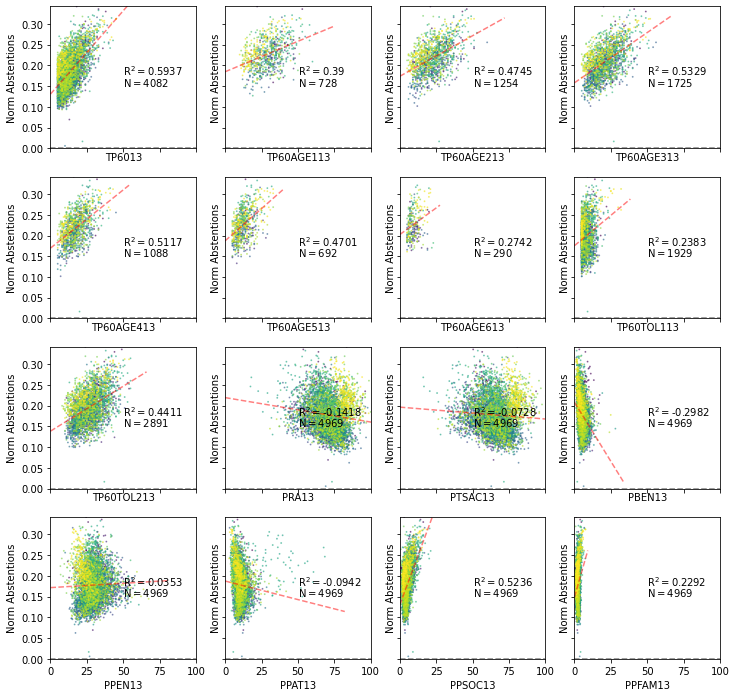

In [9]:
fig,axs = plt.subplots(4,4,figsize = (12,12),sharex=True, sharey=True)

referendumMeasurement = rdColNames[9] # {Margin : rdColNames[13]}

for i,ax in enumerate(axs.reshape(-1)):
    feature = mergedColNames[20:36][i]
    #Color by Departement
    colors = merged['Code du département'].loc[merged[feature].notna()==True]
    colors = merged['Code du département'].loc[merged[feature].notna()==True]

    x = merged[feature].loc[merged[feature].notna()==True]
    y = merged[referendumMeasurement].loc[merged[feature].notna()==True]

    colors.replace(to_replace='2A',value='02',inplace=True)
    colors.replace(to_replace='2B',value='02',inplace=True)
    colors = list(colors.apply(int))
    #colors.unique()
    
    #xlims = [0,1.1*x.max()]
    ylims = [0,y.max()*1.]
    
    #Plot margin = 0%
    _xlim = ax.set_xlim([0.,100.])
    _ylim = ax.set_ylim(ylims)
    ax.plot([0.0,100.],[0.0,0.0], color='black', linestyle='dashed', alpha=0.5)

    
    linFit = linregress(x,y)
    ax.scatter(x,y, c=colors, alpha=0.5, s = 0.8)
    ax.plot([0.,1.2*x.max()],[linFit[1],linFit[1]+1.2*x.max()*linFit[0]], color='red',linestyle='dashed', alpha=0.5)
    ax.annotate("$\mathregular{R^2=}$"+str(np.round(linFit[2],4)),xy=(50,0.175))
    ax.annotate("$\mathregular{N=}$"+str(np.shape(x)[0]),xy=(50,0.15))
    #ax.set(aspect=100)

    ax.set_xlabel(feature)
    ax.set_ylabel(referendumMeasurement)


### Department Level Statistics

In [10]:
#Load Department Stats and Fichier Localisé Social et Fiscal (2013)
departementData = pd.read_pickle('./DATA/statsByDepartement_toLoad.pkl') #Data with Margins
deptColNames = departementData.columns

revenuDeptData = pd.read_excel('./DATA/filo-revenu-pauvrete-menage-2013.xls',sheet_name='DEP',skiprows=5)
revenuDeptColNames = revenuDeptData.columns


In [11]:
#departementData.keys = departementData.keys.apply(str)
#departementData.keys = departementData.keys.apply(lambda x: x.zfill(2)) 
departementData["CODGEO"] = departementData.index
departementData["CODGEO"] = departementData["CODGEO"].apply(str)
departementData["CODGEO"] = departementData["CODGEO"].apply(lambda x: x.zfill(2))



In [12]:
# Join grid and statsByDepartement by Departement Code
mergedDept = pd.merge(departementData,revenuDeptData,how='inner',on='CODGEO')
mergedDeptColNames = mergedDept.columns

### Correlation Matrix : Department Level

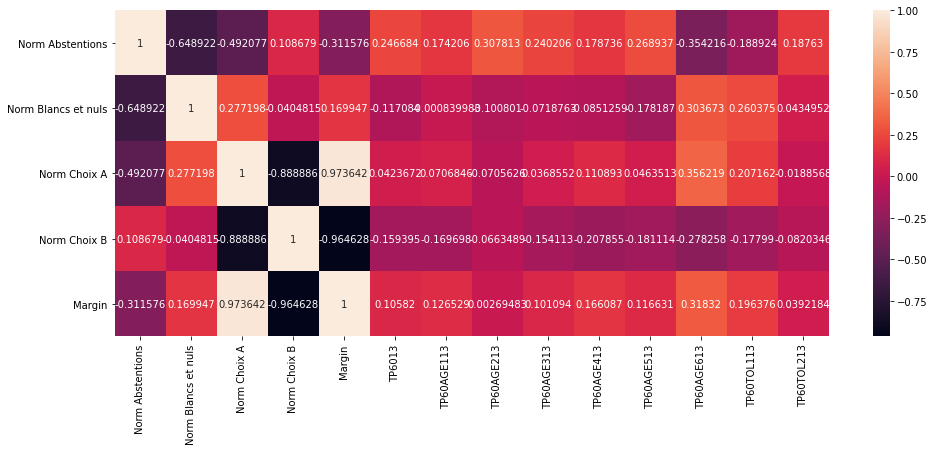

In [13]:
fig,axs = plt.subplots(1,1,figsize = (16,6))

colInterest = list(mergedDeptColNames[5:10])+list(mergedDeptColNames[16:25])

df = mergedDept[colInterest]
corrMatrix = df.corr(method='spearman')
#covMatrix = df.cov()
sns.heatmap(corrMatrix[:5], annot=True, fmt='g');
#sns.heatmap(covMatrix[:5], annot=True, fmt='g');
plt.show()

### Correlation Matrix : Commune Level

(5, 14)


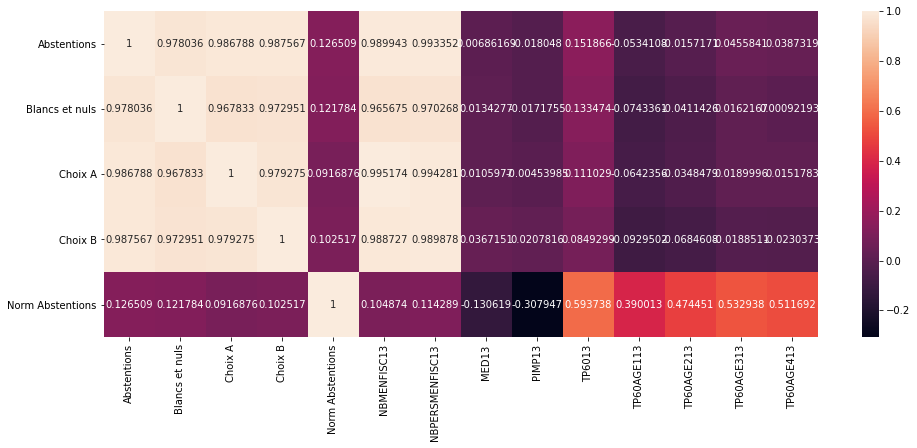

In [14]:
fig,axs = plt.subplots(1,1,figsize = (16,6))

colInterest = list(mergedColNames[5:10])+list(mergedColNames[16:25])

df = merged[colInterest]
corrMatrix = df.corr()
print(np.shape(corrMatrix[:5]))
sns.heatmap(corrMatrix[:5], annot=True, fmt='g');
plt.show()


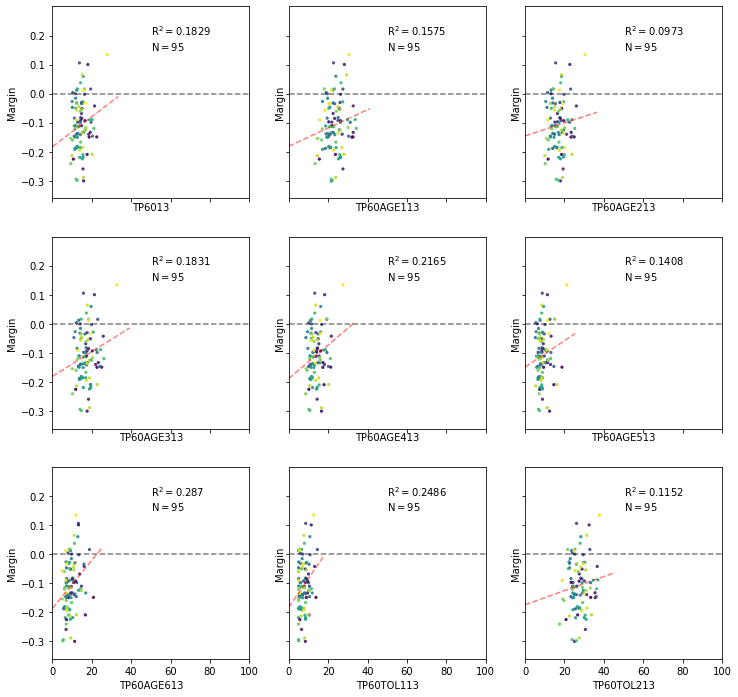

In [15]:
fig,axs = plt.subplots(3,3,figsize = (12,12),sharex=True, sharey=True)

referendumMeasurement = mergedDeptColNames[9] # {Margin : rdColNames[13]}

for i,ax in enumerate(axs.reshape(-1)):
    feature = mergedDeptColNames[16:25][i]
    
    #Color by Departement
    colors = mergedDept['CODGEO'].loc[mergedDept[feature].notna()==True]
    colors = mergedDept['CODGEO'].loc[mergedDept[feature].notna()==True]
    x = mergedDept[feature].loc[mergedDept[feature].notna()==True]
    y = mergedDept[referendumMeasurement].loc[mergedDept[feature].notna()==True]

    colors.replace(to_replace='2A',value='02',inplace=True)
    colors.replace(to_replace='2B',value='02',inplace=True)
    colors = list(colors.apply(int))
    #colors.unique()
    
    #xlims = [0,1.2*x.max()]
    xlims = [0,100]
    yl = np.max([abs(y.min()),abs(y.max())])
    ylims = [-1.2*yl,yl]
    
    #Plot margin = 0%
    #_xlim = ax.set_xlim([0.,100.])
    _xlim = ax.set_xlim(xlims)
    _ylim = ax.set_ylim(ylims)
    ax.plot([0.0,100.],[0.0,0.0], color='black', linestyle='dashed', alpha=0.5)

    
    linFit = linregress(x,y)
    ax.scatter(x,y, c=colors, alpha=0.85, s = 5)
    ax.plot([0.,1.2*x.max()],[linFit[1],linFit[1]+1.2*x.max()*linFit[0]], color='red',linestyle='dashed', alpha=0.5)
    ax.annotate("$\mathregular{R^2=}$"+str(np.round(linFit[2],4)),xy=(50,0.2))
    ax.annotate("$\mathregular{N=}$"+str(np.shape(x)[0]),xy=(50,0.15))
    #ax.set(aspect=100)

    ax.set_xlabel(feature)
    ax.set_ylabel(referendumMeasurement)

In [16]:
#Debug, check values are correct: 
mergedDept[["Margin","PPEN13"]].loc[mergedDept['CODGEO']=='75']

,Margin,PPEN13
72,0.016527,19.8


In [17]:
#Population
popData = pd.read_excel('./DATA/base-cc-evol-struct-pop-2013.xls',sheet_name='COM_2013',skiprows=5)
popColNames = popData.columns

In [18]:
colInterest = popColNames[5:35]
colInterest
#popData[colInterest[1:]]

Index(['P13_POP', 'P13_POP0014', 'P13_POP1529', 'P13_POP3044', 'P13_POP4559',
       'P13_POP6074', 'P13_POP7589', 'P13_POP90P', 'P13_POPH', 'P13_H0014',
       'P13_H1529', 'P13_H3044', 'P13_H4559', 'P13_H6074', 'P13_H7589',
       'P13_H90P', 'P13_H0019', 'P13_H2064', 'P13_H65P', 'P13_POPF',
       'P13_F0014', 'P13_F1529', 'P13_F3044', 'P13_F4559', 'P13_F6074',
       'P13_F7589', 'P13_F90P', 'P13_F0019', 'P13_F2064', 'P13_F65P'],
      dtype='object')

In [19]:
colInterest = popColNames[5:35]

popNorm  = popData[colInterest[1:]].div(popData[colInterest[0]],axis=0) 
[popNorm.rename(columns = { colName : 'Norm '+ colName }, inplace=True) for colName in colInterest]
popData[popNorm.columns] = popNorm
del popNorm

In [20]:
# Join grid and statsByDepartement by Departement Code
mergedPop = pd.merge(referendumData,popData,how='inner',on='CODGEO')
mergedPopColNames = mergedPop.columns

In [21]:
mergedPop.columns[-29:-22]
mergedPopColNames[-22:-11]
mergedPopColNames[-11:]
#mergedPopColNames[5:10]

Index(['Norm P13_POPF', 'Norm P13_F0014', 'Norm P13_F1529', 'Norm P13_F3044',
       'Norm P13_F4559', 'Norm P13_F6074', 'Norm P13_F7589', 'Norm P13_F90P',
       'Norm P13_F0019', 'Norm P13_F2064', 'Norm P13_F65P'],
      dtype='object')

(5, 16)


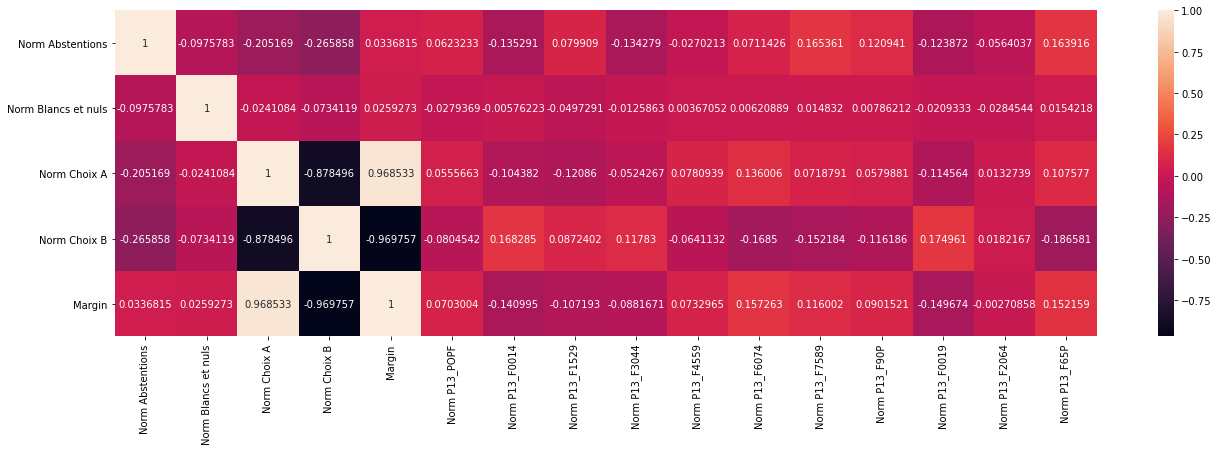

In [22]:
fig,axs = plt.subplots(1,1,figsize = (22,6))

#colInterest = list(mergedPopColNames[9:14])+list(mergedPopColNames[-29:-22])#Age
#colInterest = list(mergedPopColNames[9:14])+list(mergedPopColNames[-22:-11])#Hommes
colInterest = list(mergedPopColNames[9:14])+list(mergedPopColNames[-11:])#Femmes


df = mergedPop[colInterest]
corrMatrix = df.corr()
print(np.shape(corrMatrix[:5]))
sns.heatmap(corrMatrix[:5], annot=True, fmt='g');
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

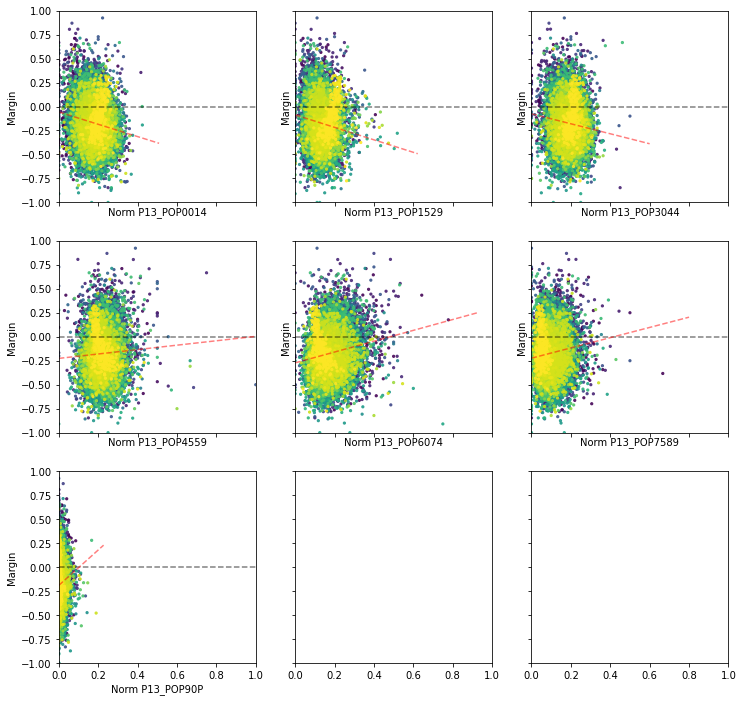

In [23]:
fig,axs = plt.subplots(3,3,figsize = (12,12),sharex=True, sharey=True)

referendumMeasurement = mergedPopColNames[13] # {Margin : rdColNames[13]}

for i,ax in enumerate(axs.reshape(-1)):
    
    if(i>len(mergedPop.columns[-29:-22])):
        break
    feature = mergedPop.columns[-29:-22][i]
    
    #Color by Departement
    colors = mergedPop['Code du département'].loc[mergedPop[feature].notna()==True]
    colors = mergedPop['Code du département'].loc[mergedPop[feature].notna()==True]
    x = mergedPop[feature].loc[mergedPop[feature].notna()==True]
    y = mergedPop[referendumMeasurement].loc[mergedPop[feature].notna()==True]

    colors.replace(to_replace='2A',value='02',inplace=True)
    colors.replace(to_replace='2B',value='02',inplace=True)
    colors = list(colors.apply(int))
    #colors.unique()
    
    #xlims = [0,1.2*x.max()]
    xlims = [0,1]
    yl = np.max([abs(y.min()),abs(y.max())])
    ylims = [-1.*yl,yl]
    
    #Plot margin = 0%
    #_xlim = ax.set_xlim([0.,100.])
    _xlim = ax.set_xlim(xlims)
    _ylim = ax.set_ylim(ylims)
    ax.plot([0.0,100.],[0.0,0.0], color='black', linestyle='dashed', alpha=0.5)

    
    linFit = linregress(x,y)
    ax.scatter(x,y, c=colors, alpha=0.85, s = 5)
    ax.plot([0.,1.2*x.max()],[linFit[1],linFit[1]+1.2*x.max()*linFit[0]], color='red',linestyle='dashed', alpha=0.5)
    ax.annotate("$\mathregular{R^2=}$"+str(np.round(linFit[2],4)),xy=(50,0.2))
    ax.annotate("$\mathregular{N=}$"+str(np.shape(x)[0]),xy=(50,0.15))
    #ax.set(aspect=100)

    ax.set_xlabel(feature)
    ax.set_ylabel(referendumMeasurement)